In [458]:
# Required libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import Normalizer
from scipy import stats
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [459]:
# Read csv file with Pandas
data = pd.read_csv("fifa21_male2.csv");

In [460]:
# Data preview
data.head()

ID         Name  Age  OVA            Nationality           Club  BOV   BP  \
0   2  G. Pasquale   33   69                  Italy        Udinese   71  LWB   
1  16  Luis García   37   71                  Spain      KAS Eupen   70   CM   
2  27      J. Cole   33   71                England  Coventry City   71  CAM   
3  36     D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   ST   
4  41      Iniesta   36   81                  Spain    Vissel Kobe   82  CAM   

       Position                                       Player Photo  \
0            LM  https://cdn.sofifa.com/players/000/002/16_120.png   
1    CM CAM CDM  https://cdn.sofifa.com/players/000/016/19_120.png   
2  CAM RM RW LM  https://cdn.sofifa.com/players/000/027/16_120.png   
3           NaN  https://cdn.sofifa.com/players/000/036/09_120.png   
4        CM CAM  https://cdn.sofifa.com/players/000/041/20_120.png   

                                          Club Logo  \
0      https://cdn.sofifa.com/teams/55/light_60.png   
1    https://cdn.sofifa.com/teams/2013/light_60.png   
2    https://cdn.sofifa.com/teams/1800/light_60.png   
3     https://cdn.sofifa.com/teams/106/light_60.png   
4  https://cdn.sofifa.com/teams/101146/light_60.png   

                                Flag Photo  POT            Team & Contract  \
0      https://cdn.sofifa.com/flags/it.png   69        Udinese 2008 ~ 2016   
1      https://cdn.sofifa.com/flags/es.png   71      KAS Eupen 2014 ~ 2019   
2  https://cdn.sofifa.com/flags/gb-eng.png   71  Coventry City 2016 ~ 2020   
3      https://cdn.sofifa.com/flags/tt.png   82            Sunderland 2009   
4      https://cdn.sofifa.com/flags/es.png   81    Vissel Kobe 2018 ~ 2021   

  Height  Weight   foot  Growth        Joined Loan Date End  Value  Wage  \
0   6'0"  181lbs   Left       0   Jul 1, 2008           NaN  €625K   €7K   
1  5'10"  143lbs  Right       0  Jul 19, 2014           NaN  €600K   €7K   
2   5'9"  161lbs  Right       0   Jan 7, 2016           NaN  €1.1M  €15K   
3  5'11"  165lbs  Right      14           NaN           NaN     €0    €0   
4   5'7"  150lbs  Right       0  Jul 16, 2018           NaN  €5.5M  €12K   

  Release Clause     Contract  Attacking  Crossing  Finishing  \
0             €0  2008 ~ 2016        313        75         50   
1          €1.1M  2014 ~ 2019        337        68         64   
2             €0  2016 ~ 2020        337        80         64   
3             €0         2009        264        54         70   
4          €7.2M  2018 ~ 2021        367        75         69   

   Heading Accuracy  Short Passing  Volleys  Skill  Dribbling  Curve  \
0                59             71     58.0    338         73   65.0   
1                61             76     68.0    369         69   79.0   
2                41             77     75.0    387         79   84.0   
3                60             80      NaN    255         68    NaN   
4                54             90     79.0    408         85   80.0   

   FK Accuracy  Long Passing  Ball Control  Movement  Acceleration  \
0           60            69            71       347            68   
1           79            71            71       305            56   
2           77            69            78       295            48   
3           46            64            77       176            59   
4           70            83            90       346            61   

   Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping  \
0            74     68.0         69     68.0    347          74     68.0   
1            50     62.0         65     72.0    324          75     54.0   
2            42     71.0         59     75.0    284          72     58.0   
3            62      NaN         55      NaN    239          63      NaN   
4            56     79.0         75     75.0    297          67     40.0   

   Stamina  Strength  Long Shots  Mentality  Aggression  Interceptions  \
0       69        68          68        320          72           69

In [461]:
# Check data shape
data.shape

(17125, 107)

In [462]:
# Check columns
data.columns

Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=107)

In [463]:
# Column name formatting
new_columns = [item.lower().replace(' ', '_').replace('.', '')  for item in data.columns]

In [464]:
data.columns = new_columns
data.columns

Index(['id', 'name', 'age', 'ova', 'nationality', 'club', 'bov', 'bp',
       'position', 'player_photo',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'gender'],
      dtype='object', length=107)

In [465]:
data.dtypes

id                    int64
name                 object
age                   int64
ova                   int64
nationality          object
club                 object
bov                   int64
bp                   object
position             object
player_photo         object
club_logo            object
flag_photo           object
pot                   int64
team_&_contract      object
height               object
weight               object
foot                 object
growth                int64
joined               object
loan_date_end        object
value                object
wage                 object
release_clause       object
contract             object
attacking             int64
crossing              int64
finishing             int64
heading_accuracy      int64
short_passing         int64
volleys             float64
skill                 int64
dribbling             int64
curve               float64
fk_accuracy           int64
long_passing          int64
ball_control        

In [466]:
data.head(300)

id                name  age  ova            nationality  \
0         2         G. Pasquale   33   69                  Italy   
1        16         Luis García   37   71                  Spain   
2        27             J. Cole   33   71                England   
3        36            D. Yorke   36   68  Trinidad &amp; Tobago   
4        41             Iniesta   36   81                  Spain   
5        61          D. Odonkor   27   66                Germany   
6        80        E. Belözoğlu   38   77                 Turkey   
7       241            R. Giggs   39   78                  Wales   
8       244       G. Neville  B   35   76                England   
9       246          P. Scholes   37   80                England   
10      249          P. Neville   35   74                England   
11      250          D. Beckham   37   78                England   
12      330            R. Keane   35   80    Republic of Ireland   
13      388         S. Campbell   35   75                England   
14      488             O. Kahn   38   87                Germany   
15      496           D. Hamann   36   61                Germany   
16      570           A. Okocha   33   73                Nigeria   
17      670                Zulu   26   66                 Brazil   
18      684        M. Schwarzer   42   73              Australia   
19      805          J. Lehmann   39   79                Germany   
20     1001           G. Király   39   69                Hungary   
21     1040      Roberto Carlos   38   79                 Brazil   
22     1041          J. Zanetti   39   75              Argentina   
23     1075        A. Del Piero   38   70                  Italy   
24     1088            A. Nesta   37   73                  Italy   
25     1109          P. Maldini   40   77                  Italy   
26     1179           G. Buffon   42   82                  Italy   
27     1183        F. Cannavaro   35   82                  Italy   
28     1186               Couto   37   82               Portugal   
29     1198          F. Inzaghi   37   73                  Italy   
30     1219          C. Abbiati   37   75                  Italy   
31     1222         Marco Paulo   35   61               Portugal   
32     1238            F. Totti   39   80                  Italy   
33     1256          C. Seedorf   37   82            Netherlands   
34     1419           P. Vieira   34   76                 France   
35     1615           L. Thuram   35   83                 France   
36     1625            T. Henry   36   79                 France   
37     1668         C. Makélelé   37   74                 France   
38     1747           G. Coupet   37   75                 France   
39     1845         O. Solskjær   34   75                 Norway   
40     2062           L. Bowyer   34   69                England   
41     2147     M. Stekelenburg   37   72            Netherlands   
42     2148         H. Trabelsi   29   79                Tunisia   
43     2196     R. Weidenfeller   36   75                Germany   
44     2231           E. Heskey   37   66                England   
45     2492              Eliseu   33   76               Portugal   
46     2651            S. Given   40   73    Republic of Ireland   
47     2702          K. Ellison   41   58                England   
48     2837            R. Delap   36   63    Republic of Ireland   
49     2956           S. Petrov   32   76               Bulgaria   
50     3281           Tarantini   36   72               Portugal   
51     3395  S. Wright-Phillips   34   68                England   
52     3467                Yuri   37   71                 Brazil   
53     3484           J. O'Shea   37   66    Republic of Ireland   
54     3622    Ricardo Carvalho   38   79               Portugal   
55     3647          M. Ballack   34   80                Germany   
56     3712                Dida   39   75                 Brazil   
57     3922        B. Schneider   34   80                Germany 

In [467]:
# Drop columns player_photo,club_logo,flag_photo, team_&_contract
data.drop(["player_photo", "club_logo", "flag_photo", 
           "team_&_contract"], axis=1, inplace=True)

In [468]:
# Drop unnecesary columns
data.drop(["nationality", "club", "joined","joined", 
           "loan_date_end", "value"
          ,"wage", "release_clause", "contract","ir"], 
          axis=1, inplace=True)

In [469]:
# Dropping the following columns since the "attacking" column is the sum of them
data.drop(["crossing", "finishing", 
           "heading_accuracy", "short_passing", 
           "volleys"], axis=1, inplace=True)

In [470]:
# format weight column
weight_lst = []
for i in data["weight"]:
    weight_lst.append(int(i[:-3]))
    
data["weight_"] = weight_lst

In [471]:
data["weight_"].head()

0    181
1    143
2    161
3    165
4    150
Name: weight_, dtype: int64

In [472]:
# Drop weight column and rename weight_ to weight
data.drop(["weight"], inplace=True, axis=1)
data.rename(columns = {"weight_": "weight"}, inplace=True)

In [473]:
# format height column
def clean_height (x):
    a = int(x.replace('"','').split('\'')[0])*12
    b = int(x.replace('"','').split('\'')[1])
    return a + b;


height_lst = []
for i in data["height"]:
    height_lst.append(clean_height(i));
    
data["height_"] = height_lst

In [474]:
data["height_"].head()

0    72
1    70
2    69
3    71
4    67
Name: height_, dtype: int64

In [475]:
# Drop height column and rename height_ to height
data.drop(["height"], inplace=True, axis=1)
data.rename(columns = {"height_": "height"}, inplace=True)

In [476]:
# Dropping columns, skill column sums them all
data.drop(["dribbling","curve","fk_accuracy", 
           "long_passing", "ball_control"], axis=1, inplace=True)

In [477]:
# Dropping columns, movement column sums them all
data.drop(["acceleration","sprint_speed",
           "agility","reactions","balance"], axis=1, inplace=True)

In [478]:
# Dropping columns, power column sums them all
data.drop(["shot_power","jumping",
           "stamina","strength", "long_shots"], 
          axis=1, inplace=True)

In [479]:
# Dropping columns, mentality column sums them all
data.drop(["aggression","interceptions", "positioning",
           "vision", "penalties", "composure"], 
          axis=1, inplace=True)

In [480]:
# Dropping columns, goalkeeping column sums them all
data.drop(["marking","standing_tackle","sliding_tackle"],
          axis=1, inplace=True)

In [481]:
# Dropping columns, defending column sums them all
data.drop(["gk_diving","gk_handling","gk_kicking", 
          "gk_positioning", "gk_reflexes"],
          axis=1,inplace=True)

In [482]:
# Dropping columns, base_stats sums them all
data.drop(["pac","sho","pas","dri","def",
           "phy","hits"],axis=1, inplace=True)

In [483]:
# Dropping columns, base_stats sums them all
data.drop(data.columns[23:50], axis=1, inplace=True)

In [486]:
data.columns

Index(['id', 'name', 'age', 'ova', 'bov', 'bp', 'position', 'pot', 'foot',
       'growth', 'attacking', 'skill', 'movement', 'power', 'mentality',
       'defending', 'goalkeeping', 'total_stats', 'base_stats', 'w/f', 'sm',
       'a/w', 'd/w', 'gender', 'weight', 'height'],
      dtype='object')

In [487]:
# Drop more columns
data.drop(["id","name"], axis=1, inplace=True)

In [488]:
# Dropping the growth column, most of the records vaue is 0
data.drop(["growth"], axis=1, inplace=True)

In [489]:
data.columns.shape

(23,)

In [490]:
# rename column w/f with weak_foot_rating,
data.rename(columns = {"w/f": "weak_foot_rating"}, inplace=True)

In [491]:
# rename column sm with skill_moves_rating,
data.rename(columns = {"sm": "skill_moves_rating"}, inplace=True)

In [492]:
# rename column a/w with agility_workrate
data.rename(columns = {"a/w": "agility_workrate"}, inplace=True)

In [493]:
# rename d/w with defensive_workrate
data.rename(columns = {"d/w": "defensive_workrate"}, inplace=True)

In [494]:
data.columns

Index(['age', 'ova', 'bov', 'bp', 'position', 'pot', 'foot', 'attacking',
       'skill', 'movement', 'power', 'mentality', 'defending', 'goalkeeping',
       'total_stats', 'base_stats', 'weak_foot_rating', 'skill_moves_rating',
       'agility_workrate', 'defensive_workrate', 'gender', 'weight', 'height'],
      dtype='object')

In [495]:
# Remove ★ from weak_foot_rating, skill_move_rating 
# and international_reputation
data["weak_foot_rating"] = data["weak_foot_rating"].str.replace(" ★","", regex=True)
data["skill_moves_rating"] = data["skill_moves_rating"].str.replace("★","", regex=True)

In [496]:
# Change rating columns dtype to int
data["weak_foot_rating"] = data["weak_foot_rating"].astype(int)
data["skill_moves_rating"] = data["skill_moves_rating"].astype(int)

In [497]:
data.columns

Index(['age', 'ova', 'bov', 'bp', 'position', 'pot', 'foot', 'attacking',
       'skill', 'movement', 'power', 'mentality', 'defending', 'goalkeeping',
       'total_stats', 'base_stats', 'weak_foot_rating', 'skill_moves_rating',
       'agility_workrate', 'defensive_workrate', 'gender', 'weight', 'height'],
      dtype='object')

In [498]:
# Replace empty records "position" column
data["position"].isnull().sum()

413

In [499]:
data["position"].shape

(17125,)

In [500]:
# Drop records based on NaNs in the column position
data.dropna(subset=["position"], inplace=True)

In [501]:
data[data["position"].isna() == True]

Empty DataFrame
Columns: [age, ova, bov, bp, position, pot, foot, attacking, skill, movement, power, mentality, defending, goalkeeping, total_stats, base_stats, weak_foot_rating, skill_moves_rating, agility_workrate, defensive_workrate, gender, weight, height]
Index: []

In [502]:
data.shape

(16712, 23)

In [503]:
# Checking every column for nulls
for col in data.columns:
    count = data[col].isnull().sum()
    if count > 0:
        print(" Column ",col," total:",count)


 Column  agility_workrate  total: 56
 Column  defensive_workrate  total: 56


In [504]:
# Drop records based on NaNs in the column position
data.dropna(subset=["agility_workrate"], inplace=True)

In [505]:
data.shape

(16656, 23)

In [506]:
data["agility_workrate"].value_counts()

Medium    10790
High       5062
Low         804
Name: agility_workrate, dtype: int64

In [507]:
data.columns

Index(['age', 'ova', 'bov', 'bp', 'position', 'pot', 'foot', 'attacking',
       'skill', 'movement', 'power', 'mentality', 'defending', 'goalkeeping',
       'total_stats', 'base_stats', 'weak_foot_rating', 'skill_moves_rating',
       'agility_workrate', 'defensive_workrate', 'gender', 'weight', 'height'],
      dtype='object')

In [508]:
# Dropping column gender since there is only unique value
data.drop("gender", axis=1, inplace=True)

In [509]:
data.head(1000)

age  ova  bov   bp       position  pot   foot  attacking  skill  \
0      33   69   71  LWB             LM   69   Left        313    338   
1      37   71   70   CM     CM CAM CDM   71  Right        337    369   
2      33   71   71  CAM   CAM RM RW LM   71  Right        337    387   
4      36   81   82  CAM         CM CAM   81  Right        367    408   
5      27   66   66   RW          RW RM   70  Right        271    276   
6      38   77   77   CM         CM CDM   77   Left        342    406   
7      39   78   78  CAM      LM CM CAM   78   Left        380    402   
9      37   80   82  CAM         CM CDM   80  Right        394    393   
10     35   74   75   CB      CDM CM RB   74  Right        315    283   
11     37   78   77   CM          CM RM   78  Right        335    419   
12     35   80   81   CF             ST   80  Right        380    374   
21     38   79   79  CDM      CDM LB LM   79   Left        328    414   
22     39   75   75  CDM       RM RB CM   75  Right        305    351   
23     38   70   74  CAM         ST CAM   70  Right        343    376   
24     37   73   72   CB             CB   73  Right        231    257   
26     42   82   82   GK             GK   82  Right         95    122   
29     37   73   72   ST             ST   73  Right        340    237   
30     37   75   75   GK             GK   75  Right         86     90   
32     39   80   82  CAM          CF ST   80  Right        386    423   
33     37   82   81  CAM            CAM   82  Right        372    417   
36     36   79   80  CAM   CF ST CAM LW   79  Right        354    383   
41     37   72   72   GK             GK   72  Right         93    106   
43     36   75   74   GK             GK   75   Left         84     75   
45     33   76   75   LB             LB   76   Left        343    349   
46     40   73   72   GK             GK   73  Right         97    103   
47     41   58   61   ST          LM ST   58   Left        297    296   
48     36   63   66   CB       CM RM RB   63  Right        325    319   
52     37   71   71   ST             ST   71  Right        337    318   
53     37   66   65   CB             CB   66  Right        241    244   
54     38   79   77   CB             CB   79  Right        303    271   
56     39   75   75   GK             GK   75   Left        123    123   
58     33   74   75  CAM         LM CAM   74  Right        332    393   
60     34   78   77  CDM      CDM CM RM   78  Right        269    267   
64     31   63   64   CB             RB   63  Right        257    267   
65     32   74   74   ST          ST CF   74  Right        364    338   
68     38   78   76   CM     CM CDM CAM   78  Right        382    399   
69     38   79   79   GK             GK   79   Left         85    108   
71     39   64   69  CDM  CM CDM LM CAM   64   Left        286    322   
76     34   77   76   ST             ST   77  Right        373    349   
77     34   72   71   ST             ST   72  Right        347    298   
78     35   74   74   ST             ST   74  Right        360    299   
81     38   70   70  CDM         CDM CM   70   Left        336    359   
85     35   75   74   CB             CB   75  Right        282    269   
87     33   76   78  CAM             CF   76  Right        362    411   
88     35   73   74  CAM          LM ST   73  Right        355    366   
89     38   77   74   CM         CM CDM   77  Right        343    428   
90     34   78   78  CAM         ST CAM   78   Left        387    403   
91     34   65   67  CAM             RM   65  Right        292    310   
93     36   79   78  CAM      CAM CM RM   79  Right        338    392   
94     35   72   72  CDM         CDM CM   72  Right        337    345   
99     36   80   81  CAM         RM CAM   80   Left        367    416   
100    33   76   78  CAM      LM CAM RM   76  Right        367    372   
101    36   81   79   ST             ST   81  Right        384    379   
104    34   86   85  CAM             CM   86  Right        369  

### Standard Data cleaning completed

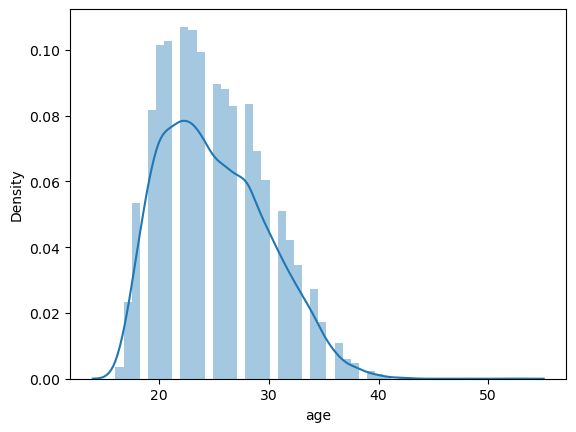

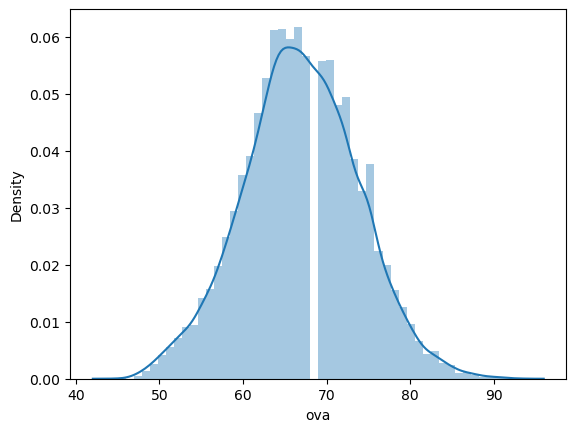

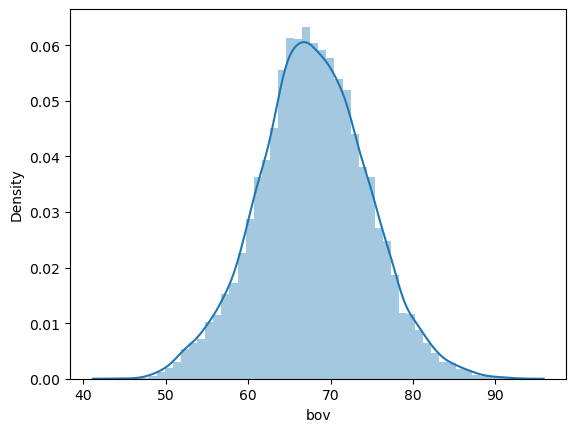

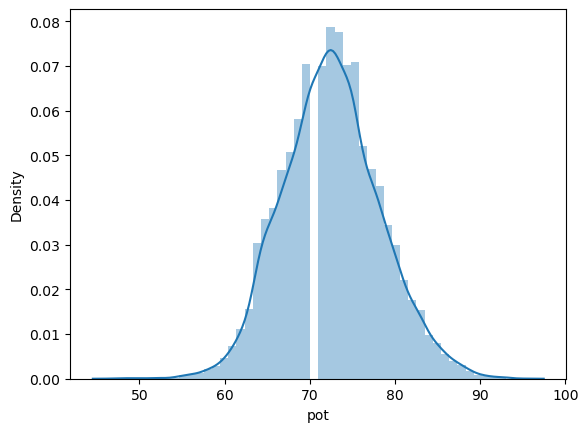

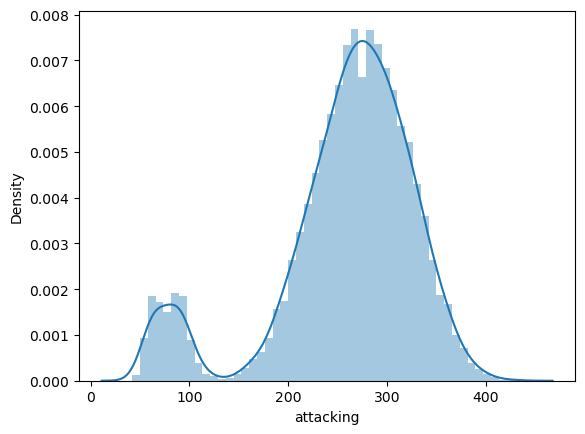

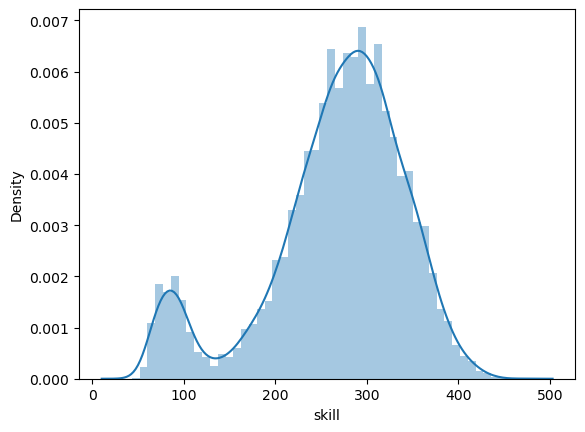

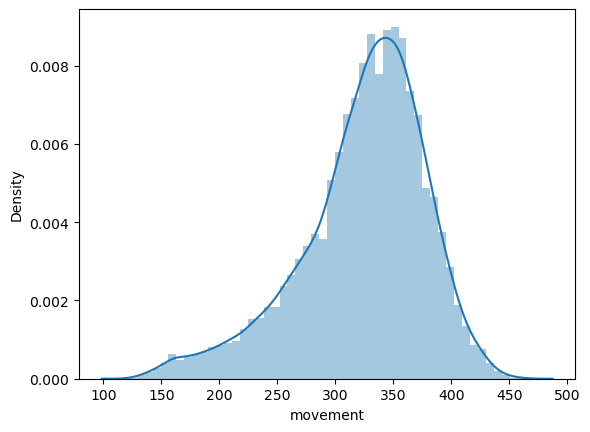

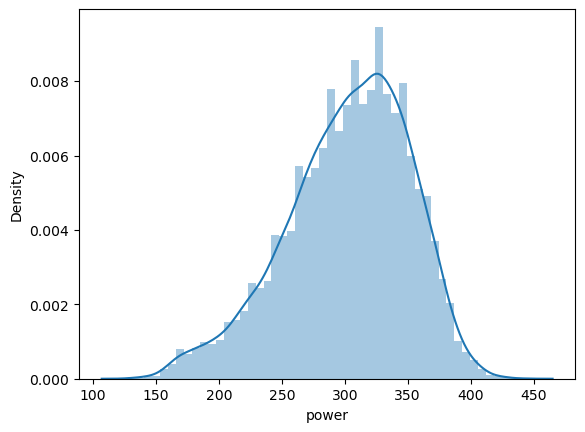

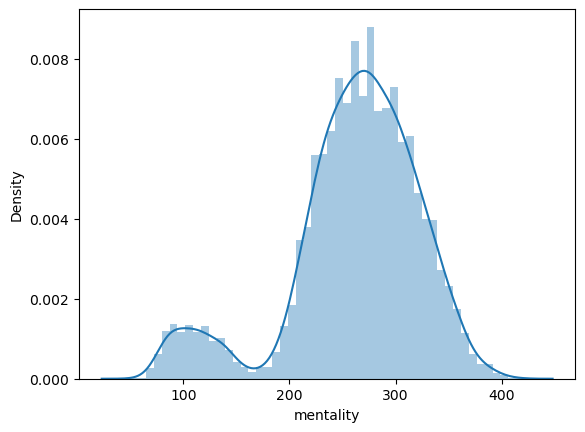

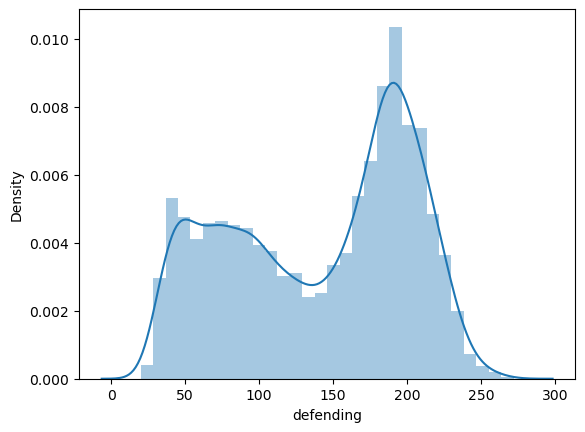

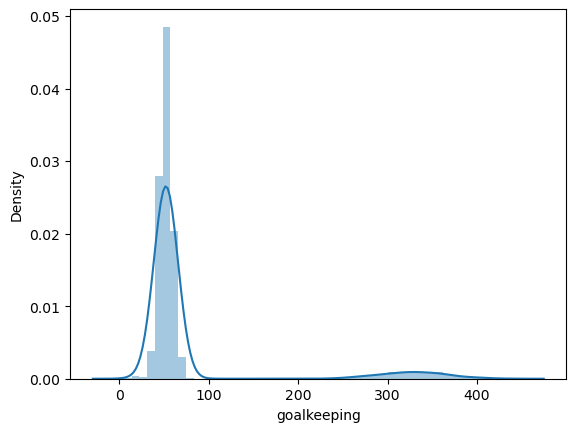

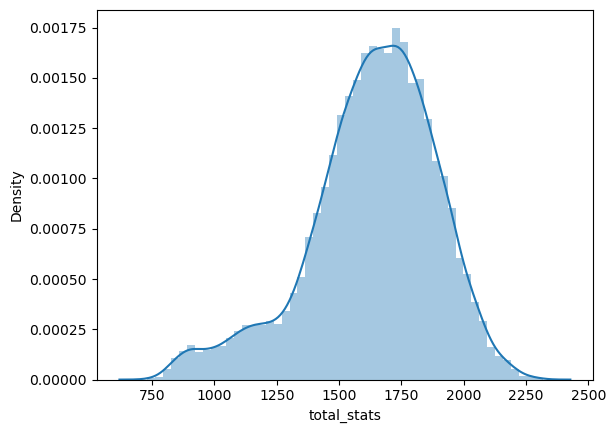

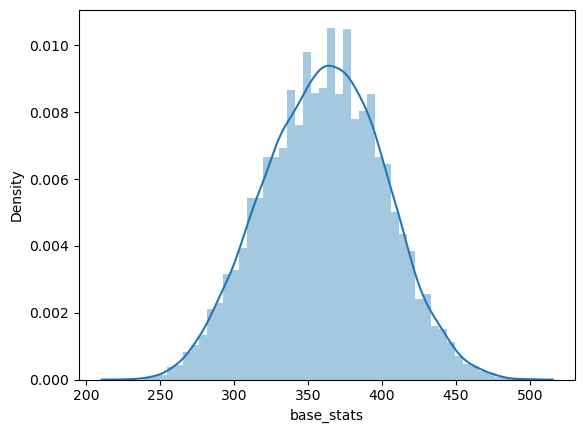

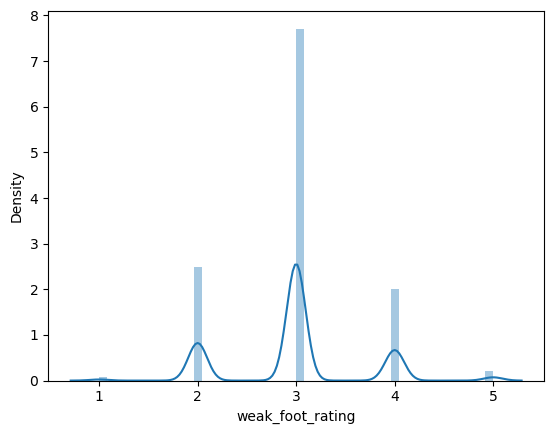

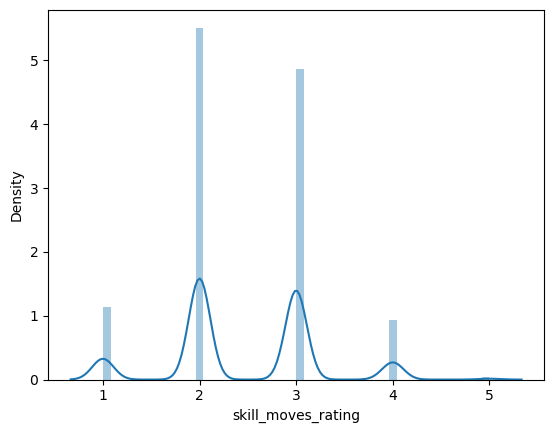

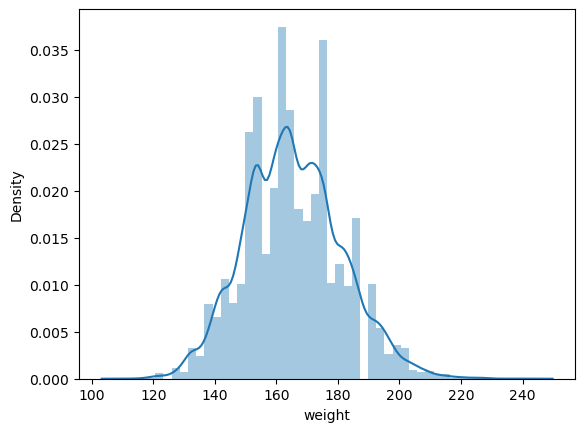

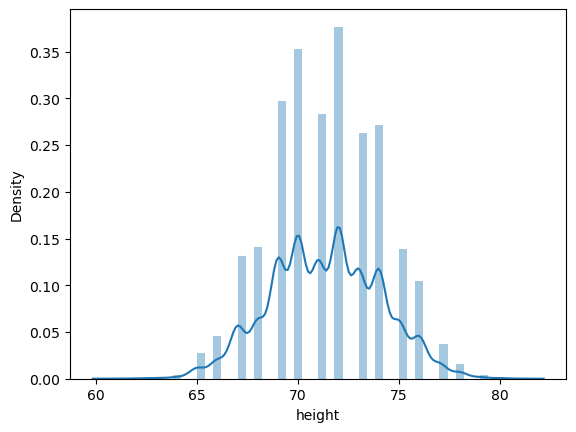

In [510]:
# Check distribution for each numerical column
for col in data.select_dtypes(include=[np.number]).columns:
    sns.distplot(data[col])
    plt.show()

<Axes: >

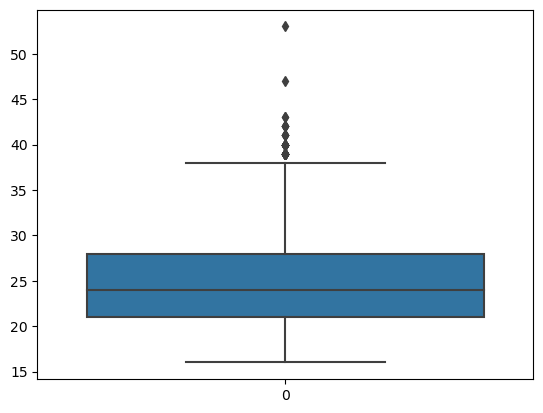

In [511]:
# Checking outliers using boxplot
sns.boxplot(data["age"])

<Axes: >

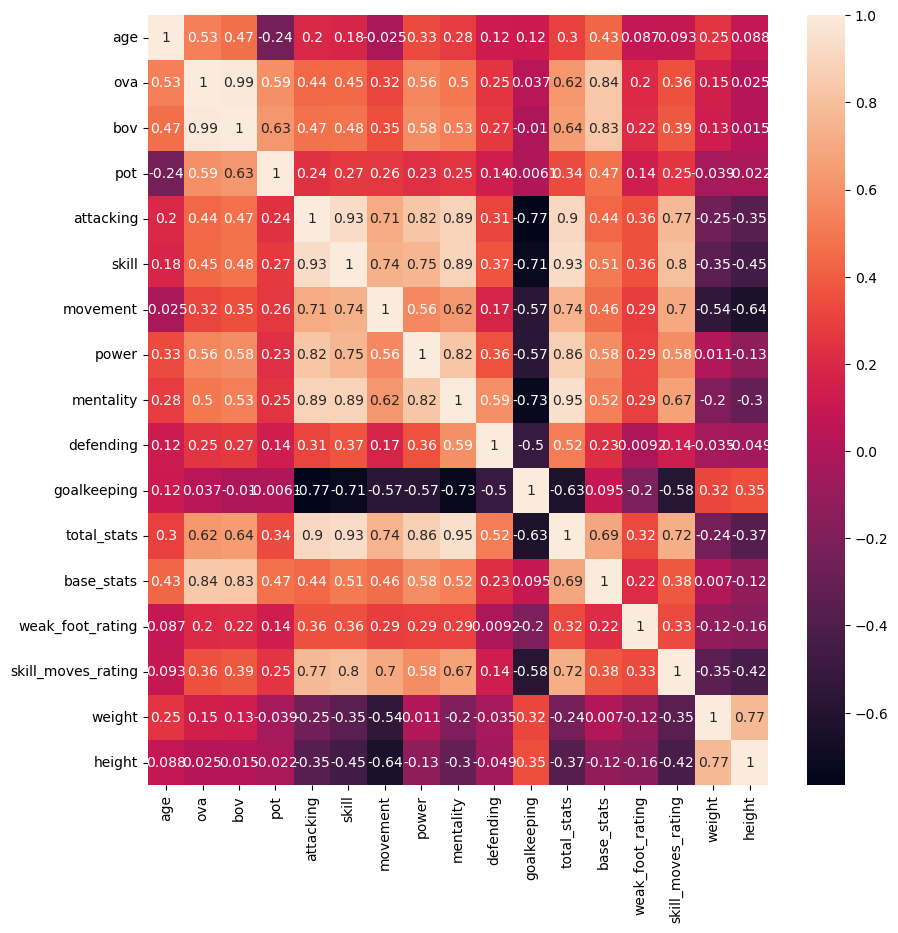

In [512]:
# Check correlation
plt.figure(figsize=(10,10))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(method="pearson"), annot=True)

In [513]:
# Removing columns attacking,skill,mentality based on correlation
data.drop(["attacking","skill","mentality","power"], inplace=True, axis=1)

<Axes: >

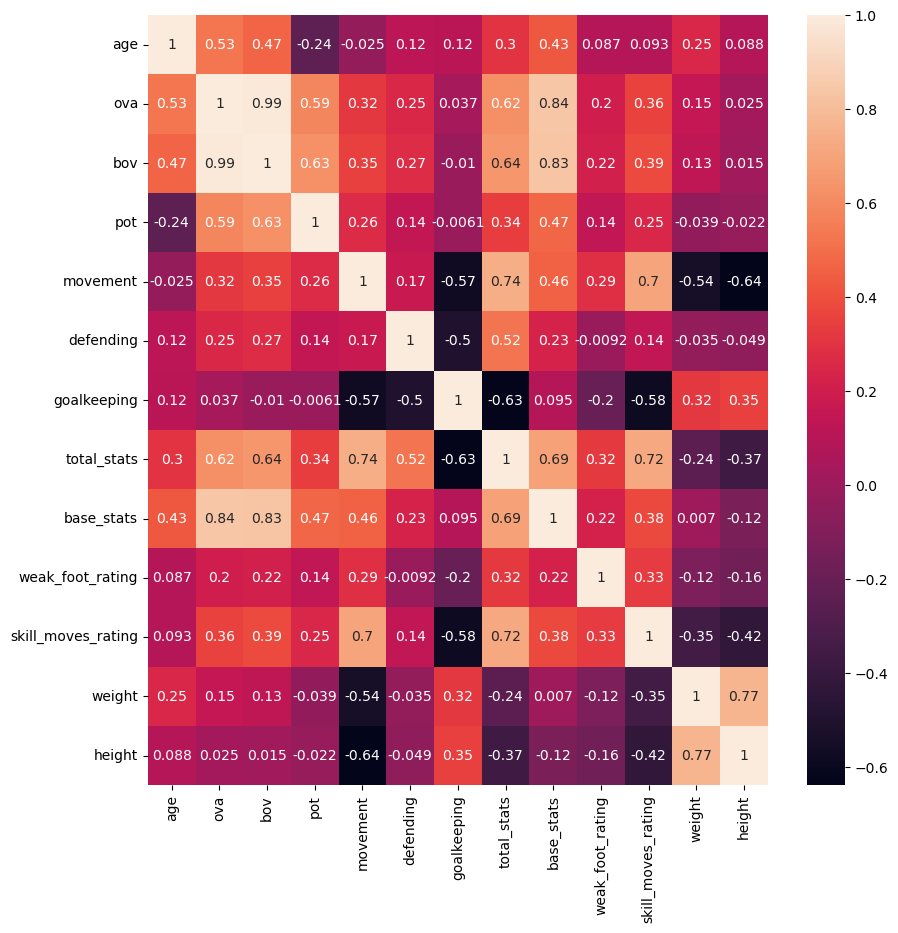

In [514]:
plt.figure(figsize=(10,10))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(method="pearson"), annot=True)

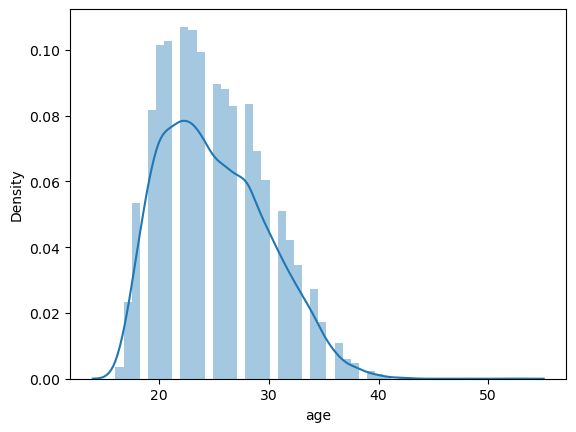

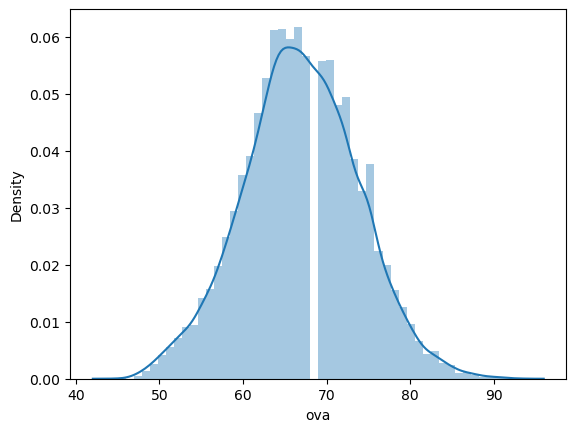

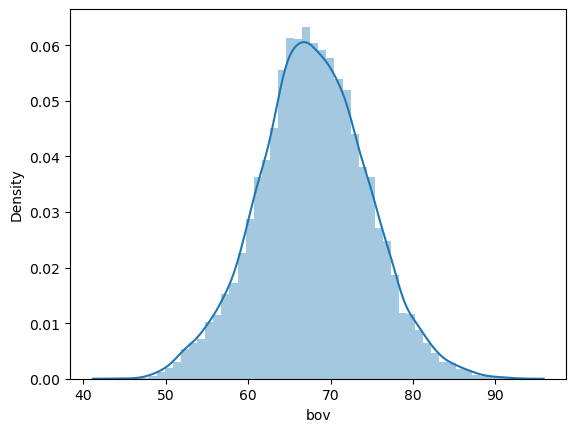

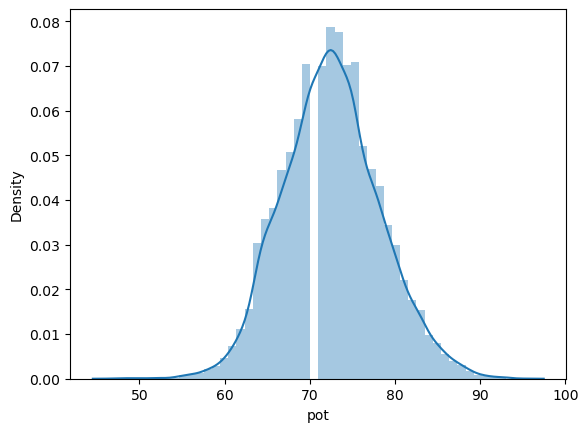

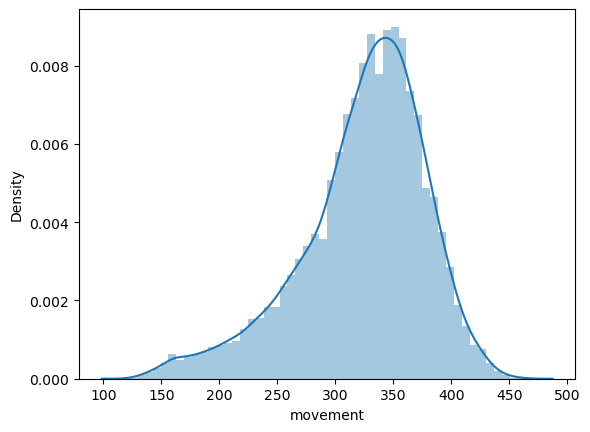

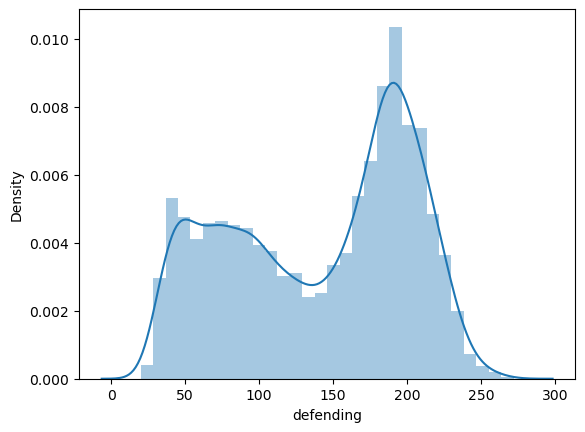

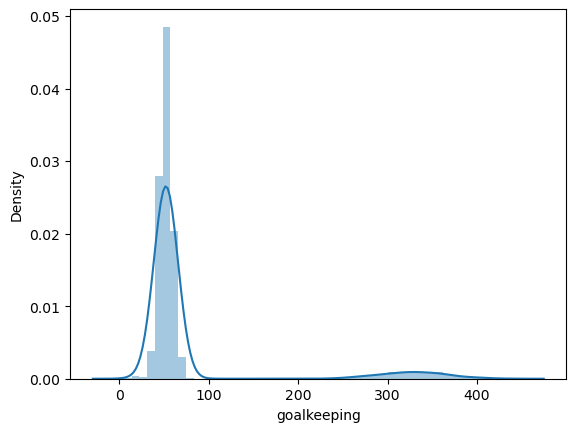

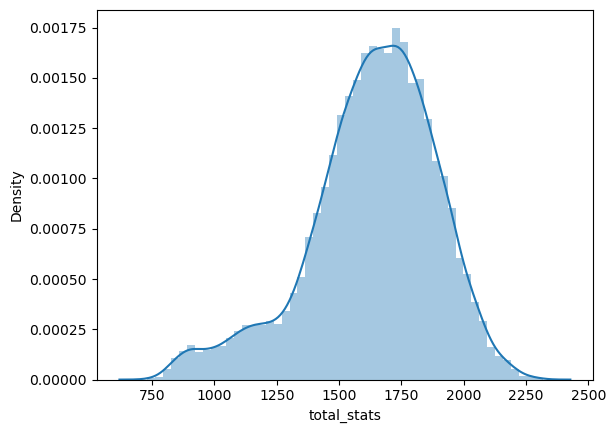

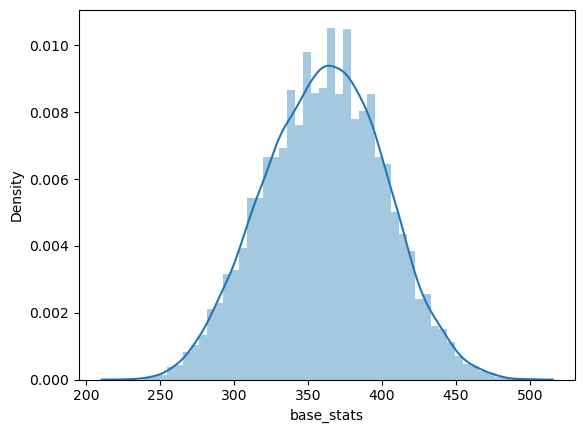

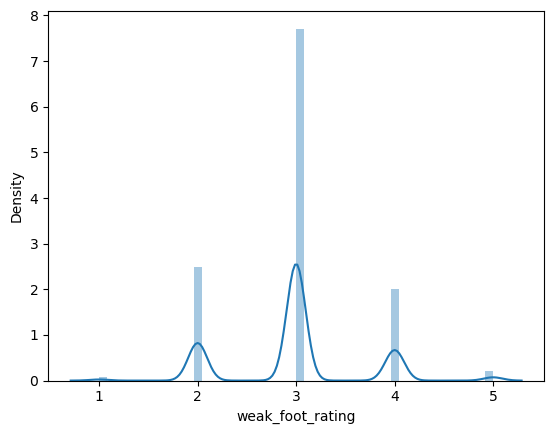

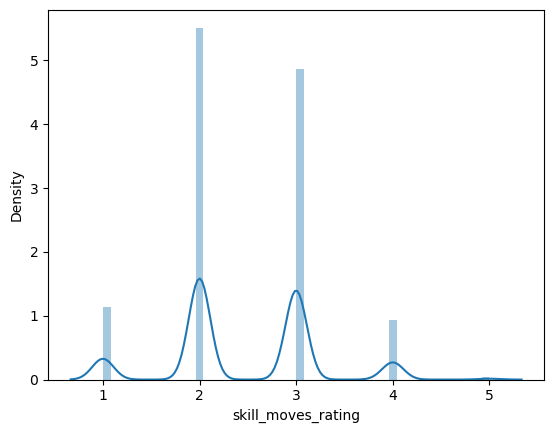

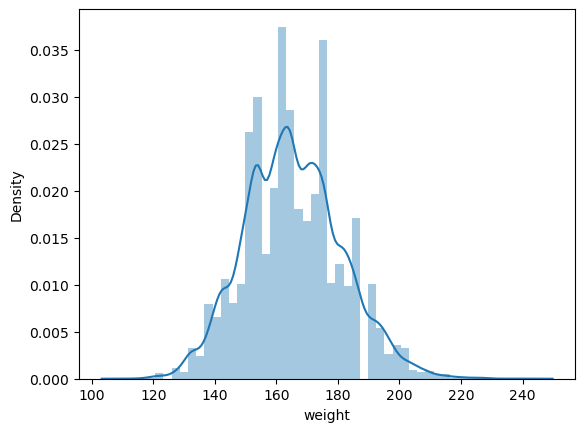

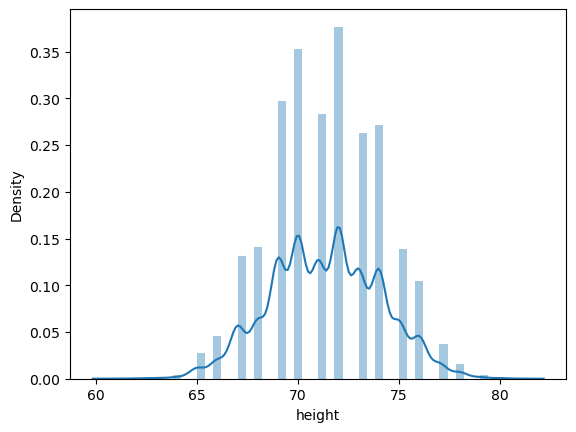

In [515]:
# Checking distribution again
# Check distribution for each feature
for col in data.select_dtypes(include=[np.number]).columns:
    sns.distplot(data[col])
    plt.show()

<Axes: >

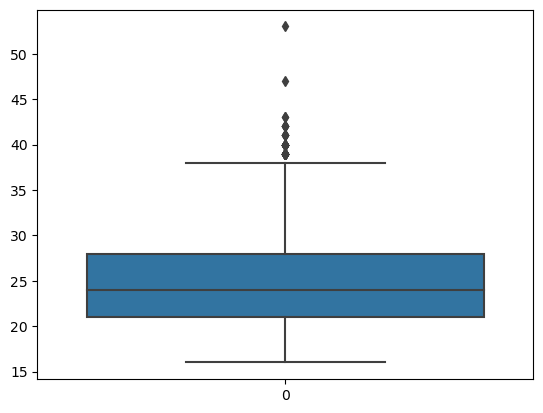

In [516]:
sns.boxplot(data["age"])

In [517]:
# Backup #1
data_bak = data

In [518]:
# Fix distribution for "age"
data = process_outliers(data,"age",3,2)

Using limit: 3,u_iqr: 2, l_iqr: 1.5
DataFrame shape: (16656, 18)
Column  age outliers shape: (4, 18)
Outliers rows % 0.0024015369836695483
Removed 4 rows


In [519]:
# Do function of code below
def process_outliers(df,col,limit = 3,u_iqr = 1.5,l_iqr = 1.5):
    print(f"Using limit: {limit},u_iqr: {u_iqr}, l_iqr: {l_iqr}")
    
    iqr = np.percentile(df[col], 75) - np.percentile(df[col], 25)
    u_limit = np.percentile(df[col], 75) + u_iqr*iqr
    l_limit = np.percentile(df[col], 25) - l_iqr*iqr
    outliers = df[(df[col]<l_limit) | (df[col]>u_limit)]
    
    # Check what percentage of the data will be removed by cleaning the ourliers
    percentage_outliers = outliers.shape[0]/df.shape[0]*10
    print("DataFrame shape:",df.shape)
    print("Column ",col,"outliers shape:",outliers.shape)
    print("Outliers rows ""%",percentage_outliers)
    
    if percentage_outliers < limit:        
        mask = (df[col] >= l_limit) & (df[col] <= u_limit)
        
        filtered_df = df[mask]
        print(f"Removed {df.shape[0] - filtered_df.shape[0]} rows")

        return filtered_df
    else:
        print(f"No outliers removed, exceeding limit of {limit}%")
        return df;

<Axes: xlabel='age', ylabel='Density'>

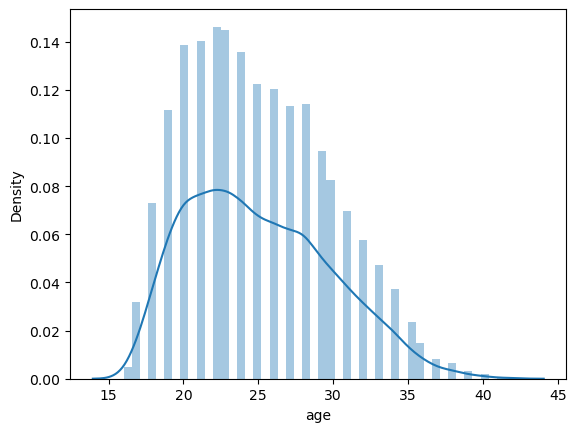

In [520]:
sns.distplot(data["age"])

<Axes: xlabel='age', ylabel='Density'>

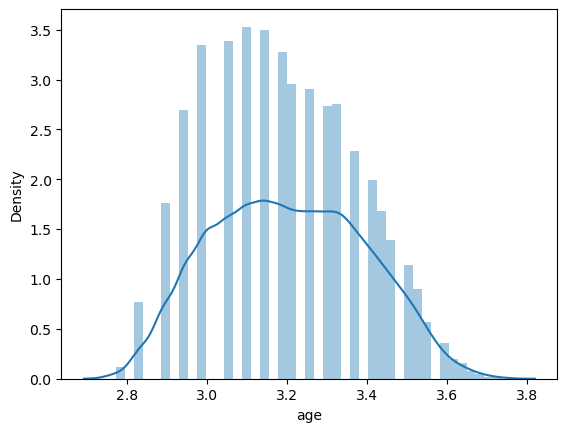

In [521]:
# Using log method to improve the normal distribution
data["age"] = np.log(data["age"])
sns.distplot(data["age"])

In [522]:
#TODO: KEEP GOING THRU THE COLUMNS TO CLEAN OUTLIERS

In [523]:
data_bak2 = data

<Axes: xlabel='pot', ylabel='Density'>

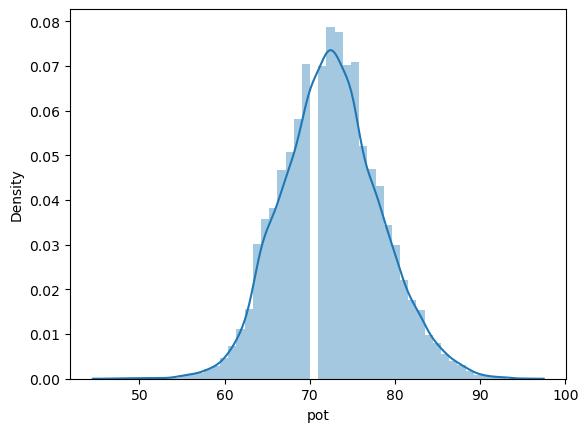

In [524]:
### Cleaning outliers pot column
sns.distplot(data["pot"])

<Axes: >

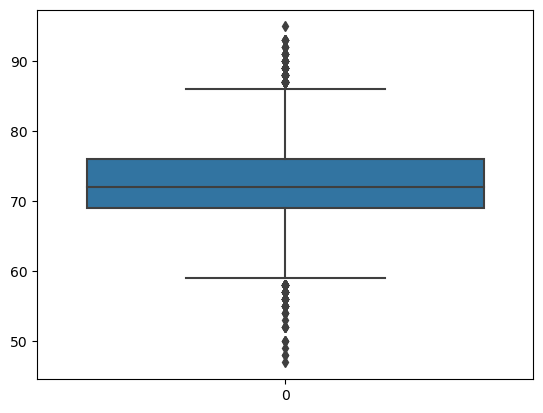

In [525]:
sns.boxplot(data["pot"])

Using limit: 3,u_iqr: 1.5, l_iqr: 1.5
DataFrame shape: (16652, 18)
Column  pot outliers shape: (279, 18)
Outliers rows % 0.16754744174873887
Removed 279 rows


<Axes: xlabel='pot', ylabel='Density'>

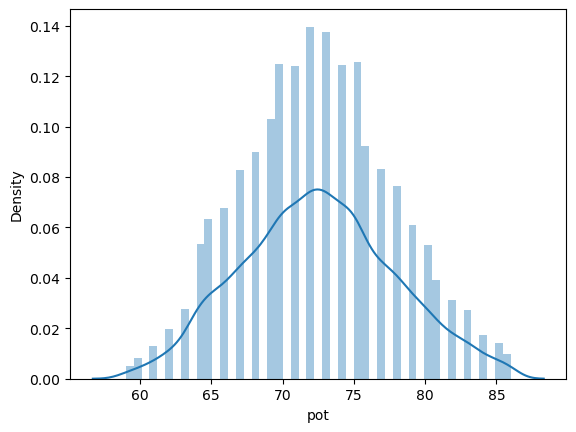

In [526]:
# Remove outliers from pot column
data = process_outliers(data,"pot")
sns.distplot(data["pot"])

<Axes: >

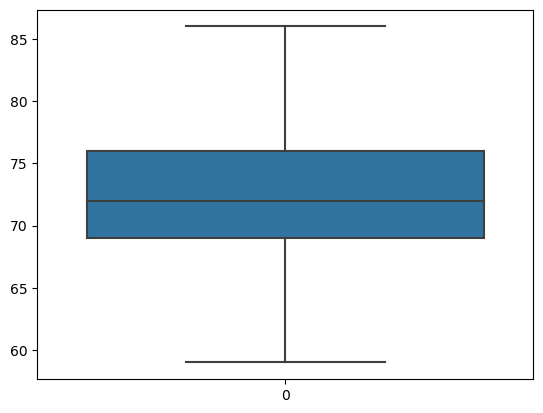

In [527]:
sns.boxplot(data["pot"])

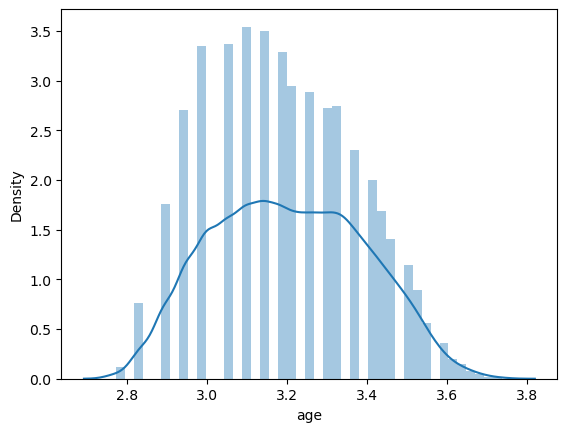

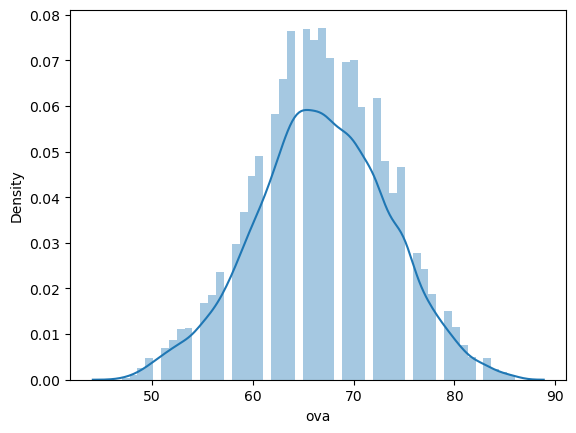

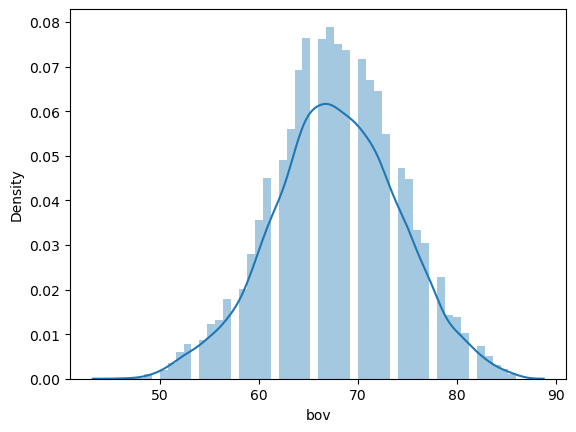

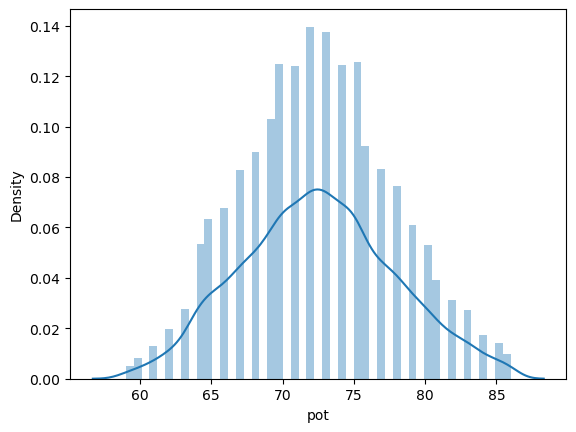

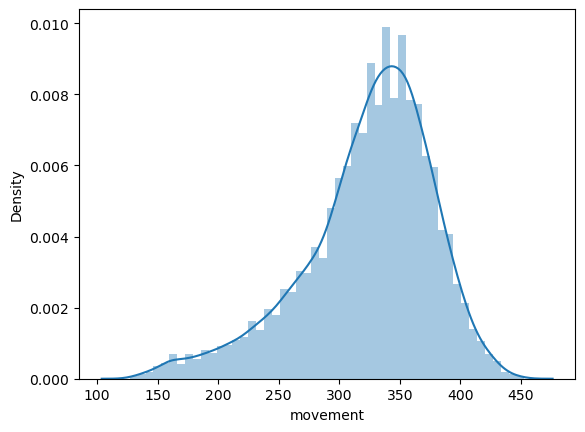

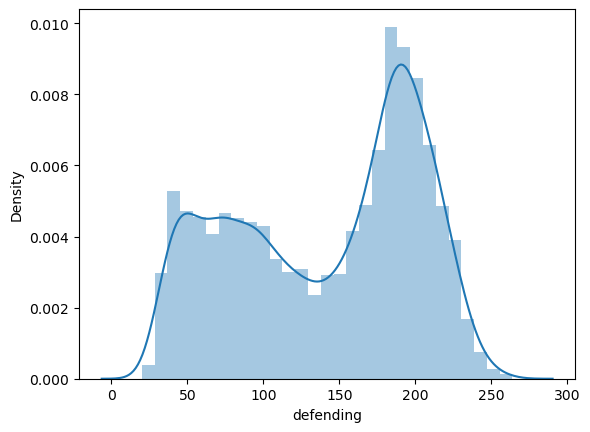

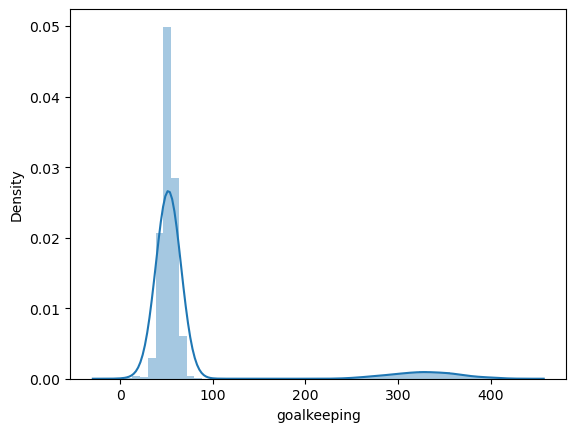

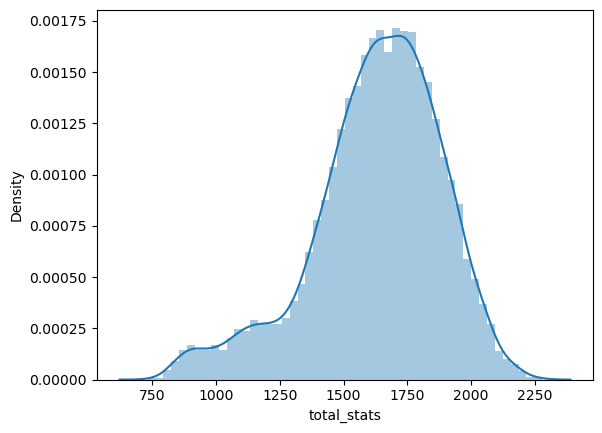

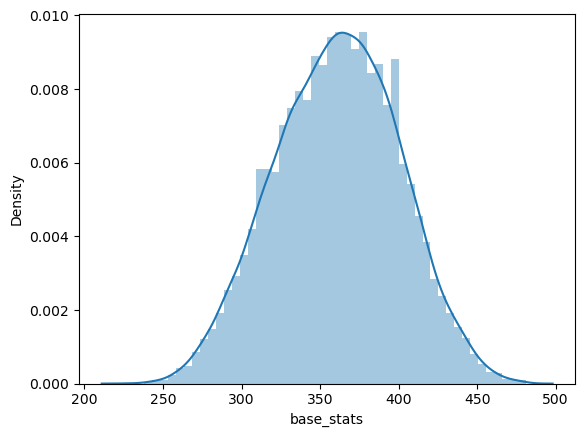

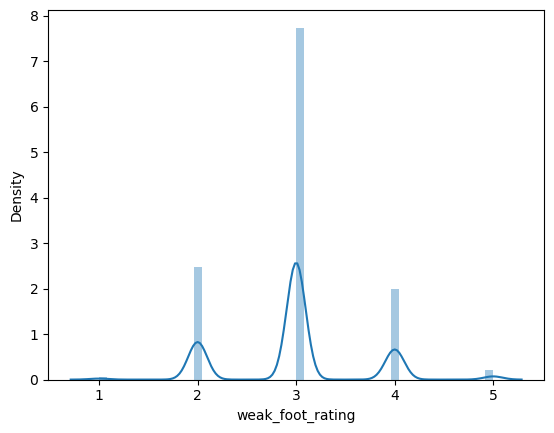

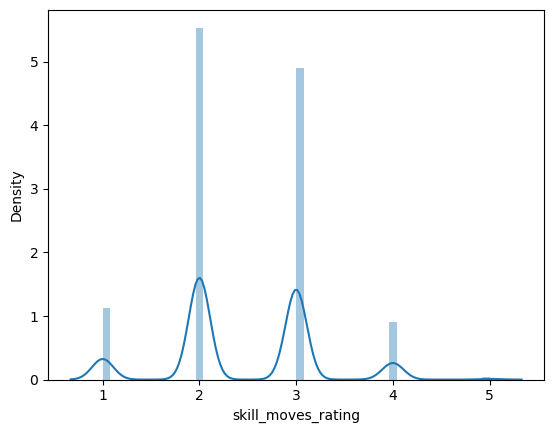

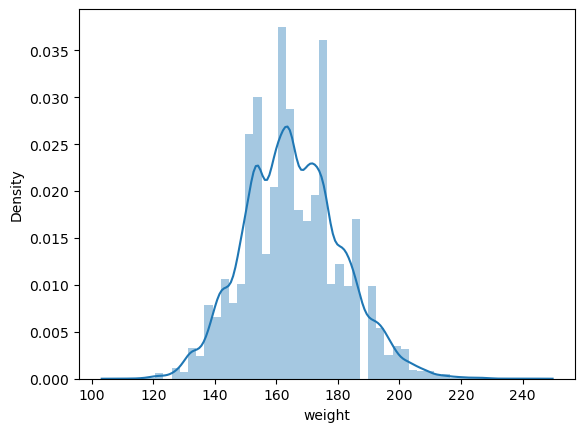

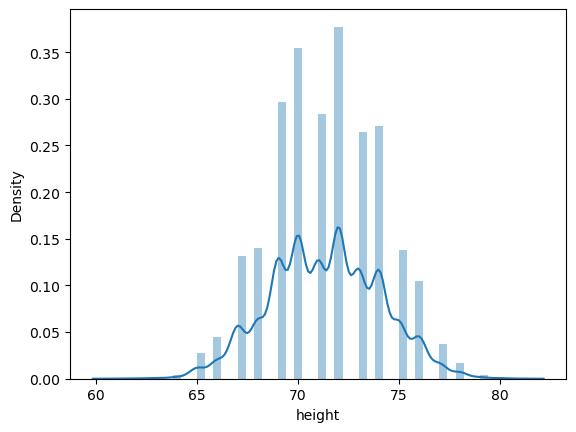

In [528]:
for col in data.select_dtypes(include=[np.number]).columns:
    sns.distplot(data[col])
    plt.show()

In [529]:
data_bak3 = data

In [530]:
# Data for movement column is slighly right skewed
data = process_outliers(data,"movement")

Using limit: 3,u_iqr: 1.5, l_iqr: 1.5
DataFrame shape: (16373, 18)
Column  movement outliers shape: (548, 18)
Outliers rows % 0.3346973676174189
Removed 548 rows


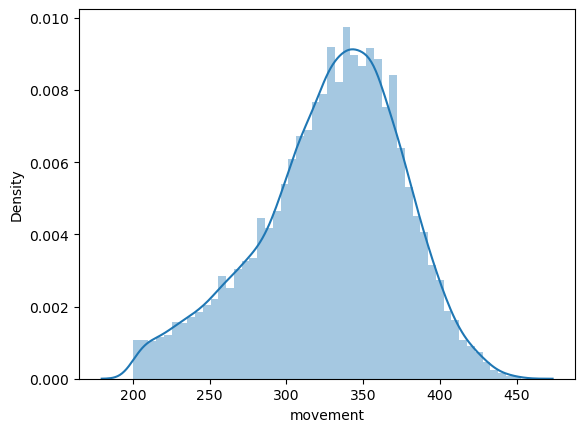

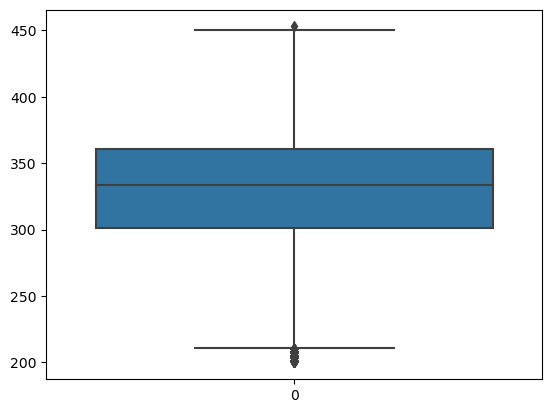

In [531]:
sns.distplot(data["movement"])
plt.show()
sns.boxplot(data["movement"])
plt.show()

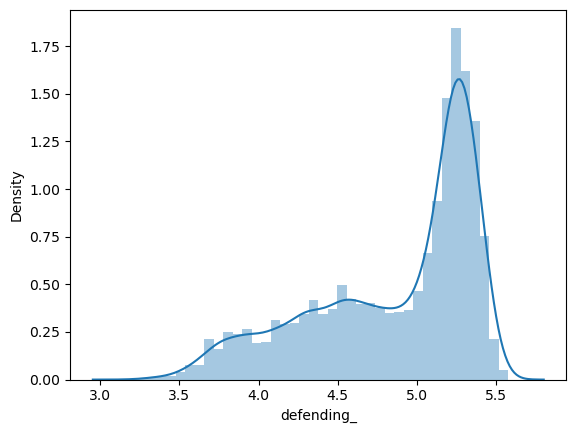

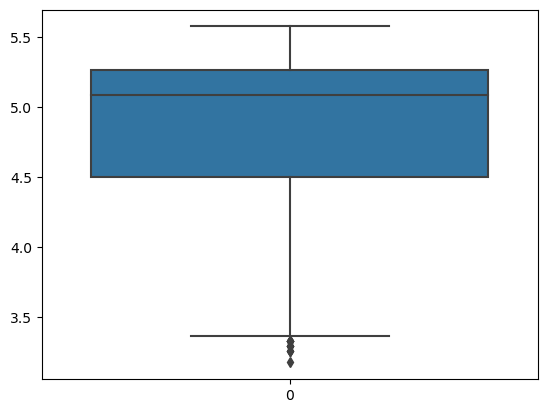

In [532]:
# TODO: can't figure out the proper way to fix a bi-dimensional distribution
# Doing log transform
data["defending_"] = np.log(data["defending"])
sns.distplot(data["defending_"])
plt.show()
sns.boxplot(data["defending_"])
plt.show()
data.drop(["defending"], axis=1, inplace=True)

In [533]:
data_bak4 = data

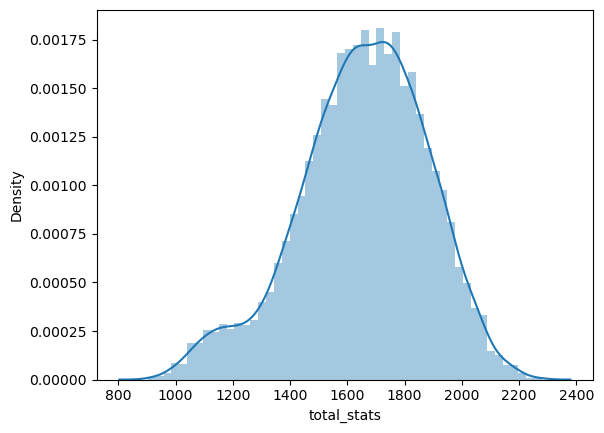

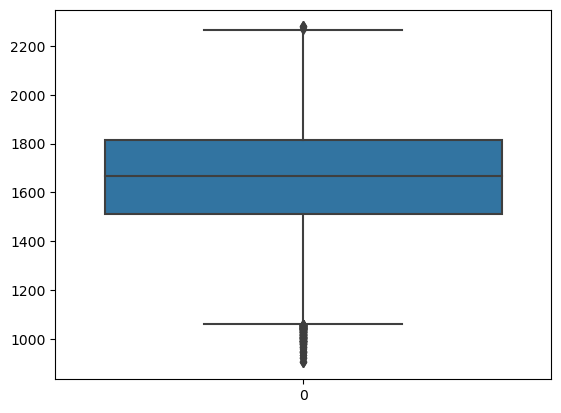

In [534]:
sns.distplot(data["total_stats"])
plt.show()
sns.boxplot(data["total_stats"])
plt.show()

In [535]:
data = process_outliers(data,"total_stats")

Using limit: 3,u_iqr: 1.5, l_iqr: 1.5
DataFrame shape: (15825, 18)
Column  total_stats outliers shape: (154, 18)
Outliers rows % 0.09731437598736178
Removed 154 rows


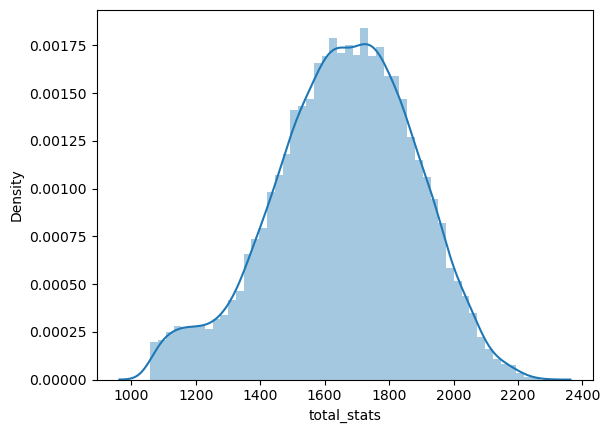

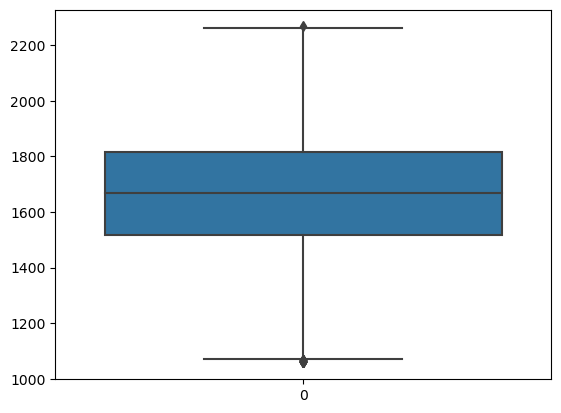

In [536]:
sns.distplot(data["total_stats"])
plt.show()
sns.boxplot(data["total_stats"])
plt.show()

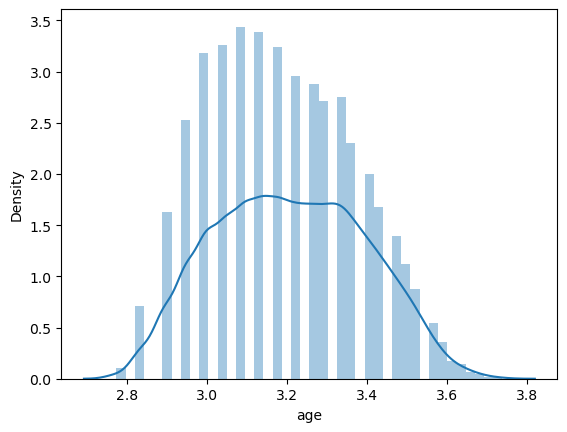

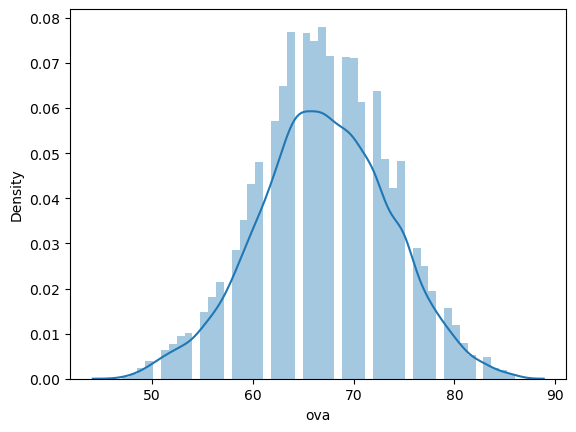

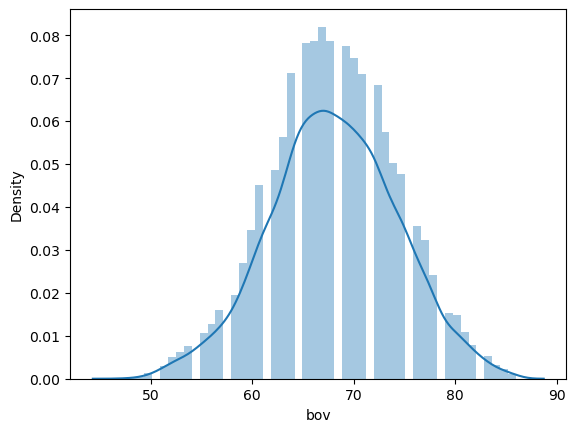

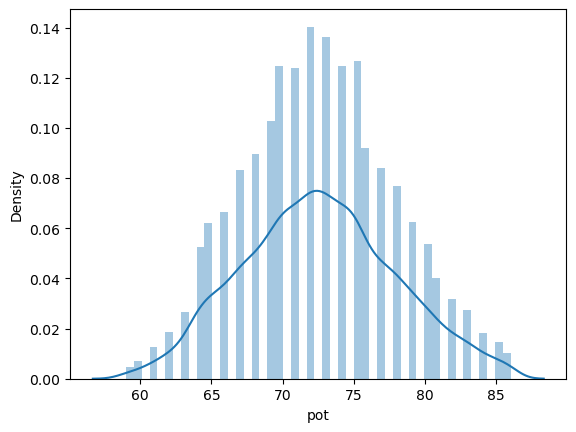

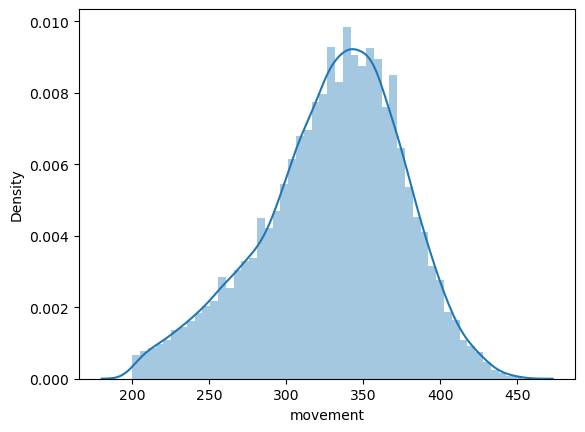

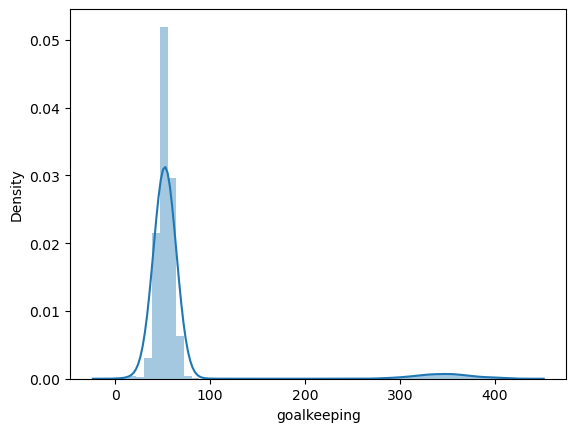

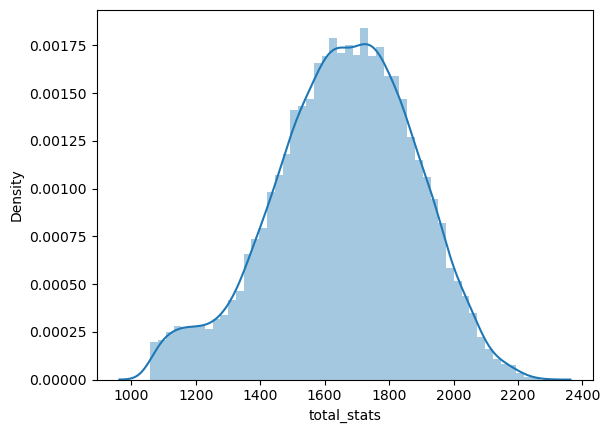

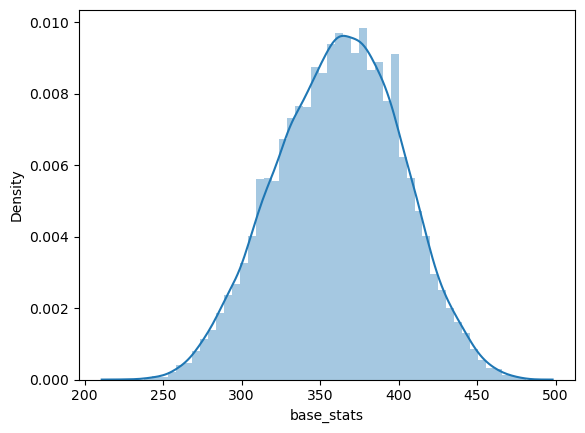

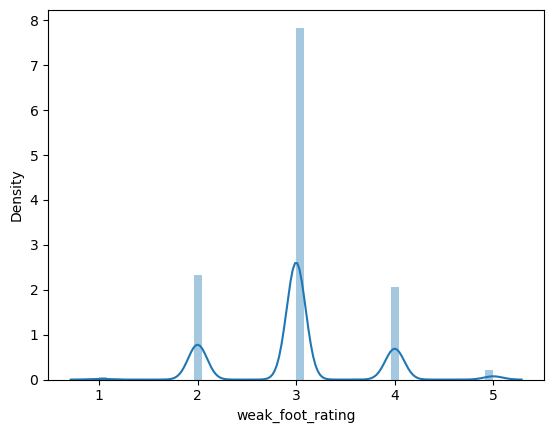

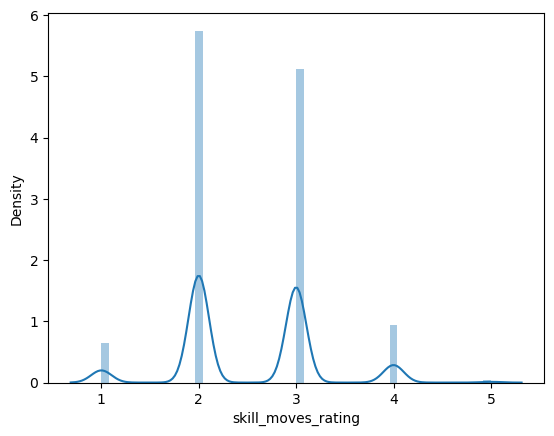

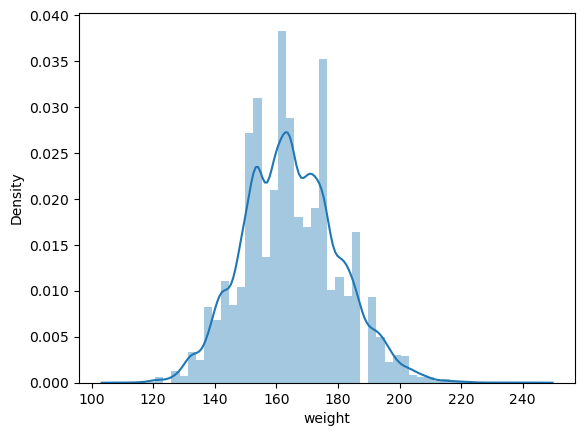

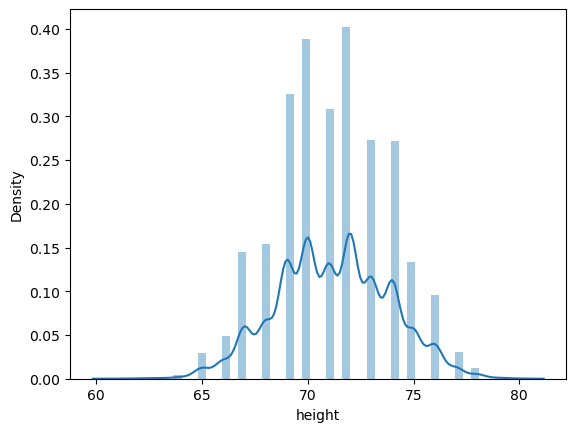

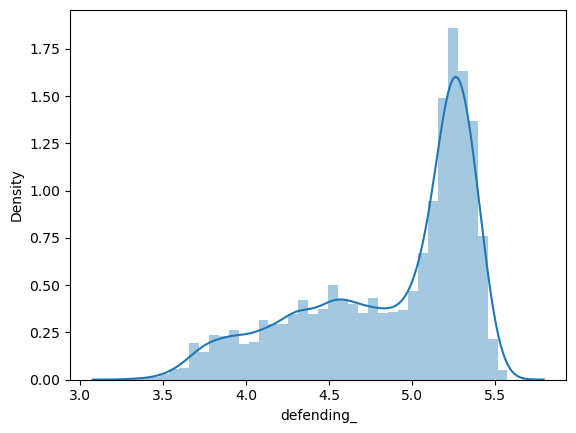

In [537]:
for col in data.select_dtypes(include=[np.number]).columns:
    sns.distplot(data[col])
    plt.show()

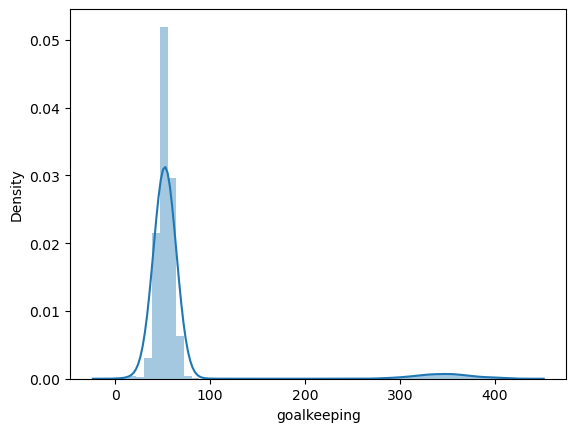

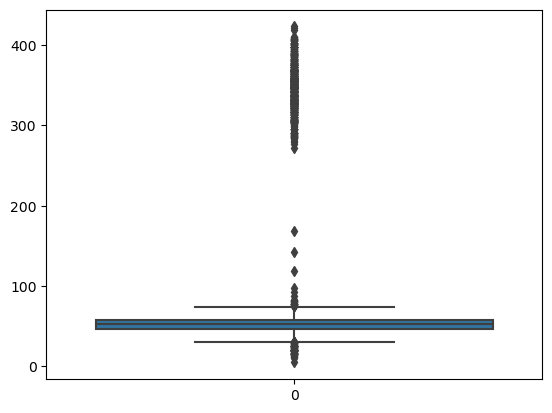

In [538]:
sns.distplot(data["goalkeeping"])
plt.show()
sns.boxplot(data["goalkeeping"])
plt.show()

In [539]:
data_bak5 = data

In [540]:
data = process_outliers(data,"goalkeeping")

Using limit: 3,u_iqr: 1.5, l_iqr: 1.5
DataFrame shape: (15671, 18)
Column  goalkeeping outliers shape: (934, 18)
Outliers rows % 0.5960053602195138
Removed 934 rows


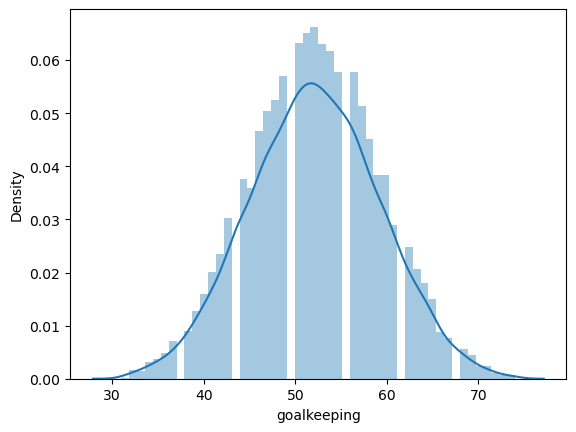

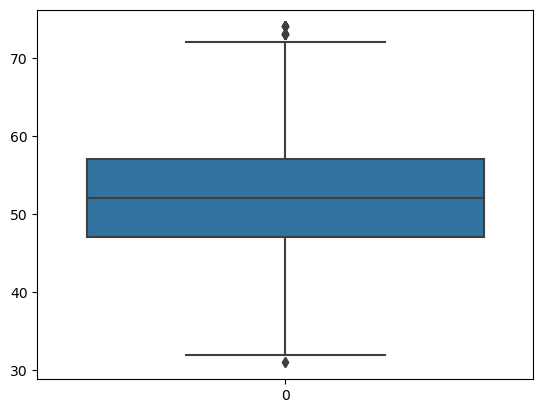

In [541]:
sns.distplot(data["goalkeeping"])
plt.show()
sns.boxplot(data["goalkeeping"])
plt.show()

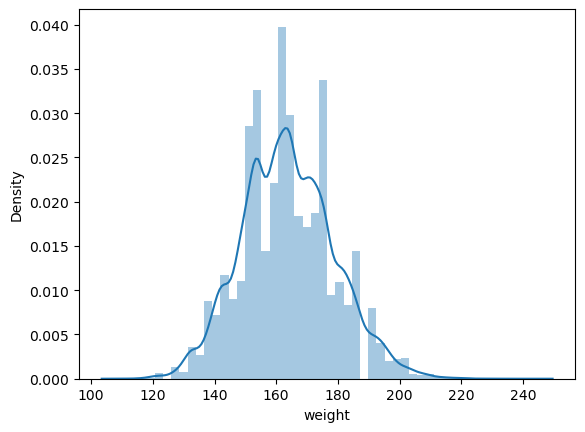

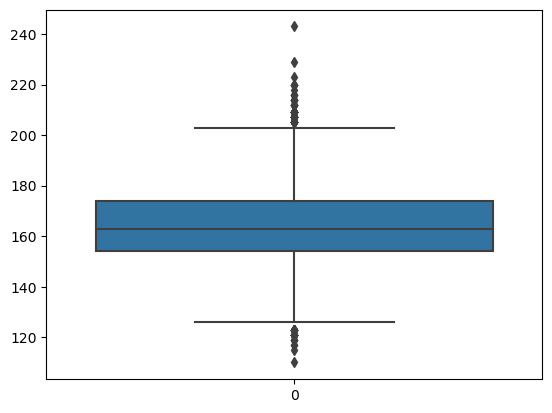

In [542]:
sns.distplot(data["weight"])
plt.show()
sns.boxplot(data["weight"])
plt.show()

In [543]:
data_bak6 = data

In [544]:
data = process_outliers(data,"weight")

Using limit: 3,u_iqr: 1.5, l_iqr: 1.5
DataFrame shape: (14737, 18)
Column  weight outliers shape: (115, 18)
Outliers rows % 0.0780348781977336
Removed 115 rows


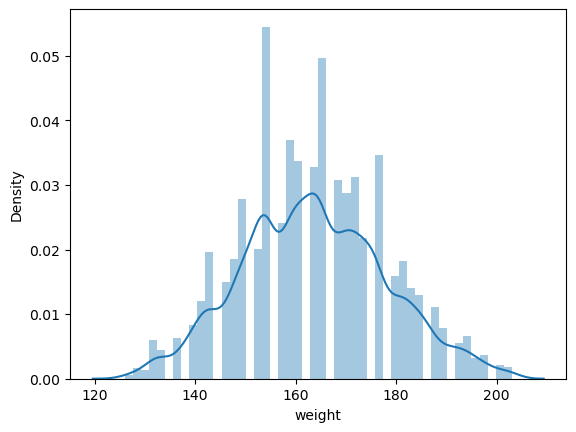

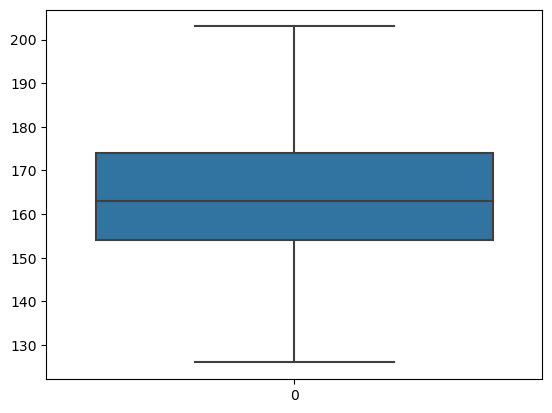

In [545]:
sns.distplot(data["weight"])
plt.show()
sns.boxplot(data["weight"])
plt.show()

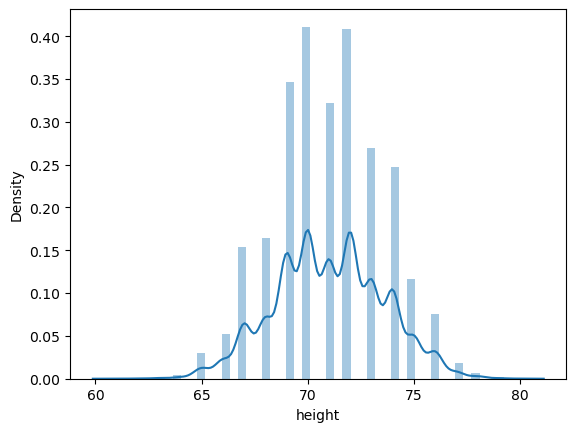

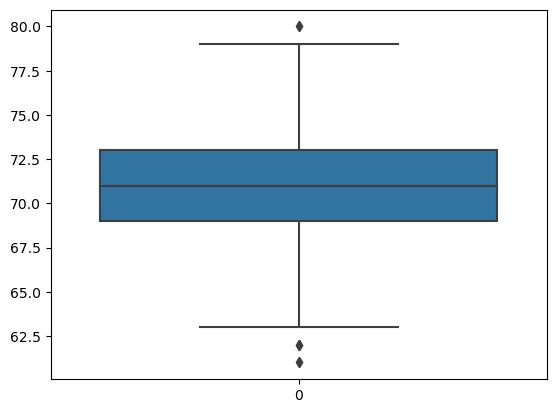

In [546]:
sns.distplot(data["height"])
plt.show()
sns.boxplot(data["height"])
plt.show()

In [547]:
# Creating the numericals and categoricals DFs
numericals = data.select_dtypes(include=[np.number])
categoricals = data.select_dtypes(include=[object])
target = numericals["ova"]
# Moving weak_foot_rating and skill_moves_rating to the categorical df and removing from numerical
categoricals["weak_foot_rating"] = data["weak_foot_rating"]
categoricals["skill_moves_rating"] = data["skill_moves_rating"]
numericals.drop(["weak_foot_rating","skill_moves_rating","ova"], axis=1, inplace=True)


In [548]:
# OneHotEncoder for the categoricals
encoded = OneHotEncoder(drop='first').fit_transform(categoricals).toarray()

In [549]:
encoded = pd.DataFrame(encoded)
encoded.head(100)

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   \
0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
5   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
11  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
12  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
13  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
14  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
15  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
16  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
17  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
18  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
19  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
20  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
22  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
23  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
24  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
25  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
26  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
27  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
28  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
29  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
30  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
31  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
32  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
33  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
34  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
35  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
36  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
37  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
38  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
39  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
40  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
41  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
42  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
43  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
44  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
45  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
46  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
47  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
48  0.0  1.0  0.0  0.0  0.0  0.0  0

In [550]:
# Scaler
scaled = StandardScaler().fit_transform(numericals)
scaled = pd.DataFrame(scaled)

In [551]:
scaled.head(10)

0         1         2         3         4         5         6  \
0  1.623829  0.500230 -0.658503  0.297869  0.545278  1.263725  1.219823   
1  2.243410  0.340709 -0.284525 -0.699588  0.545278  1.144726  0.631360   
2  1.623829  0.500230 -0.284525 -0.937078 -0.158508  0.441085 -0.161785   
3  2.095032  2.254962  1.585366  0.274120 -1.003052  1.703501  1.526847   
4  0.537111 -0.297376 -0.471514  1.699059 -0.862294 -0.184949 -0.008273   
5  2.387830  1.457357  0.837410 -0.628341 -0.721537  1.719022  1.091896   
6  2.528498  1.616878  1.024399  0.060379 -2.832895  1.315463  0.810458   
7  2.243410  2.254962  1.398377  0.084128 -0.721537  1.967366  1.398920   
8  1.942475  1.138314  0.276443 -0.319604 -1.566080  0.948121  0.529019   
9  2.243410  1.457357  1.024399 -0.390851 -0.158508  1.693153  1.296579   

          7         8         9  
0  1.203586  0.390508  0.908512  
1 -1.427932 -0.393080  0.219256  
2 -0.181424 -0.784874 -0.757771  
3 -0.943179 -1.568461  0.596448  
4 -0.042923 -1.176668 -1.264270  
5 -0.319925 -1.568461  0.705362  
6 -0.458426 -0.393080 -0.326012  
7 -0.458426 -1.568461  0.067550  
8  0.303330 -0.001286  1.074840  
9  0.095578  0.390508  0.174811

In [552]:
# Concatenating both processed dataframes
features_processed = pd.concat([encoded, scaled], axis = 1)

In [553]:
# Training
x_train, x_test, y_train, y_test = train_test_split(features_processed , target, test_size=.2, random_state=10)

In [554]:
# Model
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [555]:
# Model Score
model.score(x_test,y_test)

0.9750380401231966